<a href="https://colab.research.google.com/github/Shamshuddeen-nadaf/Deep_Learning_OCR_CNN_LSTM/blob/Shamshuddeen/ocr_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/balanced/incomplete.1GLPYF_3.1.0/emnist-train.tfrecord*...:   0%|  …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/balanced/incomplete.1GLPYF_3.1.0/emnist-test.tfrecord*...:   0%|   …

Dataset emnist downloaded and prepared to /root/tensorflow_datasets/emnist/balanced/3.1.0. Subsequent calls will reuse this data.
Batch images shape: (128, 28, 28, 1)
Batch labels shape: (128, 47)


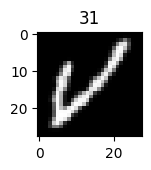

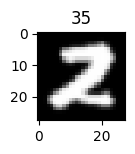

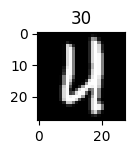

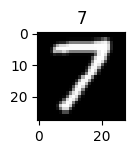

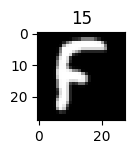

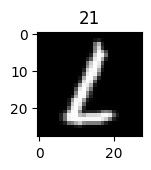

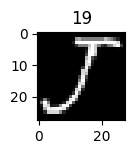

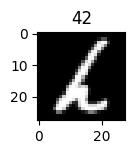

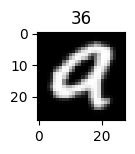

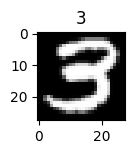

In [2]:
import tensorflow_datasets as tfds
import tensorflow as tf
import numpy as np
(ds_train, ds_test), ds_info = tfds.load(
    'emnist/balanced',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)
def preprocess(image, label):
    image = tf.transpose(image)
    image = tf.cast(image, tf.float32) / 255.0
    image = tf.reshape(image, (28, 28, 1))
    label = tf.one_hot(label, depth=47)
    return image, label
ds_train = ds_train.map(preprocess).batch(128).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.map(preprocess).batch(128).prefetch(tf.data.AUTOTUNE)
for images, labels in ds_train.take(1):
    print(f"Batch images shape: {images.shape}")
    print(f"Batch labels shape: {labels.shape}")
#print the images

import matplotlib.pyplot as plt

for image,label in ds_train.take(1):
    for i in range(10):
        plt.subplot(2,5,i+1)
        plt.imshow(image[i].numpy().squeeze(),cmap='gray')
        plt.title(np.argmax(label[i],axis=0))
        plt.tight_layout()
        plt.show()


In [8]:
# Make a normal ocr model using cnn
from tensorflow.keras import layers, models
cnn_model = models.Sequential([ layers.Input((28,28,1)),
                                layers.Conv2D(32,(3,3),activation='relu'),
                                layers.MaxPooling2D((2,2)),
                                layers.Conv2D(64,(3,3),activation='relu'),
                                layers.MaxPooling2D((2,2)),
                                layers.Dropout(0.25),
                                layers.Conv2D(128,(3,3),activation='relu'),
                                layers.MaxPooling2D((2,2)),
                                layers.Flatten(),
                                layers.Dense(128,activation='relu'),
                                layers.Dropout(0.25),
                                layers.Dense(47,activation='softmax')
                              ])
cnn_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
cnn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 47)             │         6,063 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 115,247 (450.18 KB)

 Trainable params: 115,247 (450.18 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=3,min_delta=0.001)
history  = cnn_model.fit(ds_train,epochs=15,validation_data=ds_test,callbacks=early_stop)

Epoch 1/15
882/882 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.4102 - loss: 2.0877 - val_accuracy: 0.7684 - val_loss: 0.7022
Epoch 2/15
882/882 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7459 - loss: 0.7690 - val_accuracy: 0.8022 - val_loss: 0.5850
Epoch 3/15
882/882 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7820 - loss: 0.6419 - val_accuracy: 0.8217 - val_loss: 0.5222
Epoch 4/15
882/882 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8023 - loss: 0.5770 - val_accuracy: 0.8323 - val_loss: 0.4863
Epoch 5/15
882/882 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8163 - loss: 0.5345 - val_accuracy: 0.8370 - val_loss: 0.4673
Epoch 6/15
882/882 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8219 - loss: 0.5077 - val_accuracy: 0.8416 - val_loss: 0.4575
Epoch 7/15
882/882 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8275 - loss: 0.4884 - val_accuracy: 0.8463 - val_loss: 0.4431
Epoch 8/15
882/882 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8344 - loss: 0.4736 - val_accuracy

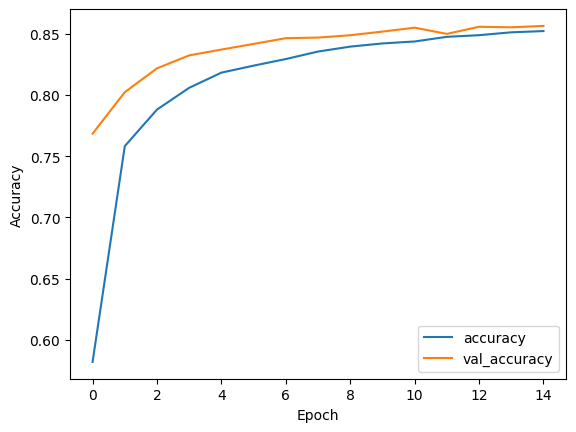

In [11]:
# plot accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

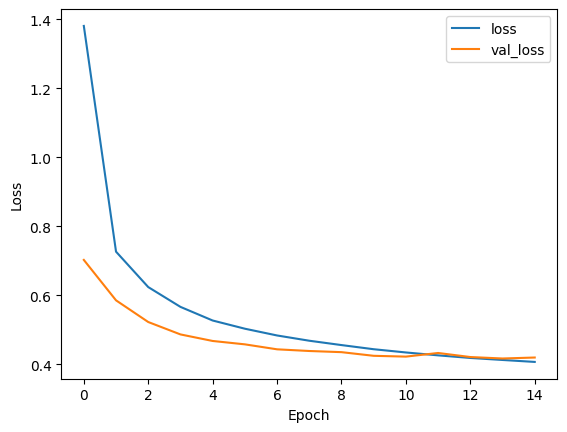

In [12]:
# plot loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [13]:
cnn_model.save('cnn_model.keras')